### Data Manipulation in Pandas - GDP in the Middle East

In [3]:
import pandas as pd
import os

In [11]:
url = "https://perso.telecom-paristech.fr/eagan/class/igr204/data/factbook.csv"
countries = pd.read_csv(url, delimiter=';', skiprows=[1])
countries.head()

,Country,Area(sq km),Birth rate(births/1000 population),Current account balance,Death rate(deaths/1000 population),Debt - external,Electricity - consumption(kWh),Electricity - production(kWh),Exports,GDP,...,Oil - production(bbl/day),Oil - proved reserves(bbl),Population,Public debt(% of GDP),Railways(km),Reserves of foreign exchange & gold,Telephones - main lines in use,Telephones - mobile cellular,Total fertility rate(children born/woman),Unemployment rate(%)
0,Afghanistan,647500,47.02,NaN,20.75,8.000000e+09,6.522000e+08,5.400000e+08,4.460000e+08,2.150000e+10,...,0.0,0.000000e+00,29928987.0,NaN,NaN,NaN,33100.0,15000.0,6.75,NaN
1,Akrotiri,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,28748,15.08,-5.040000e+08,5.12,1.410000e+09,6.760000e+09,5.680000e+09,5.524000e+08,1.746000e+10,...,2000.0,1.855000e+08,3563112.0,NaN,447.0,1.206000e+09,255000.0,1100000.0,2.04,14.8
3,Algeria,2381740,17.13,1.190000e+10,4.60,2.190000e+10,2.361000e+10,2.576000e+10,3.216000e+10,2.123000e+11,...,1200000.0,1.187000e+10,32531853.0,37.4,3973.0,4.355000e+10,2199600.0,1447310.0,1.92,25.4
4,American Samoa,199,23.13,NaN,3.33,NaN,1.209000e+08,1.300000e+08,3.000000e+07,5.000000e+08,...,0.0,NaN,57881.0,NaN,NaN,NaN,15000.0,2377.0,3.25,6.0


In [73]:
country_GDP = countries[['Country', 'GDP']].dropna().reset_index(drop = True)
country_GDP.head()

,Country,GDP
0,Afghanistan,2.150000e+10
1,Albania,1.746000e+10
2,Algeria,2.123000e+11
3,American Samoa,5.000000e+08
4,Andorra,1.900000e+09


In [74]:
country_GDP.sort_values(by = ['GDP'], ascending = True).head(1)

,Country,GDP
206,Tokelau,1500000.0


In [75]:
# GDP for Lebanon
country_GDP.query("Country == 'Lebanon'")

,Country,GDP
116,Lebanon,1.883000e+10


In [76]:
country_GDP[country_GDP['Country'] == 'Lebanon']['GDP']

116    1.883000e+10
Name: GDP, dtype: float64

In [94]:
Countries_ME = ['Lebanon', 'Syria', 'Yemen', 'Saudi Arabia', 'United Arab Emirates', 'Egypt', 'Jordan', 'Bahrain', 'Qatar', 'Oman', 'Iraq', 'Iran', 'Kuwait', 'Turkey']
sum(country_GDP.Country.isin(Countries_ME))

14

In [80]:
# GDP in the middl east
GDP_ME = country_GDP[country_GDP.Country.isin(Countries_ME)]
sorted_ME_GDP = GDP_ME.sort_values(by=['GDP'], ascending = True).reset_index(drop = True)
sorted_ME_GDP

,Country,GDP
0,Bahrain,1.301000e+10
1,Yemen,1.625000e+10
2,Lebanon,1.883000e+10
3,Qatar,1.949000e+10
4,Jordan,2.550000e+10
5,Oman,3.809000e+10
6,Kuwait,4.800000e+10
7,Syria,6.044000e+10
8,United Arab Emirates,6.367000e+10
9,Iraq,8.980000e+10


In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

Text(0.5, 1.0, 'Gross Domestic Product for Countries in the Middle East')

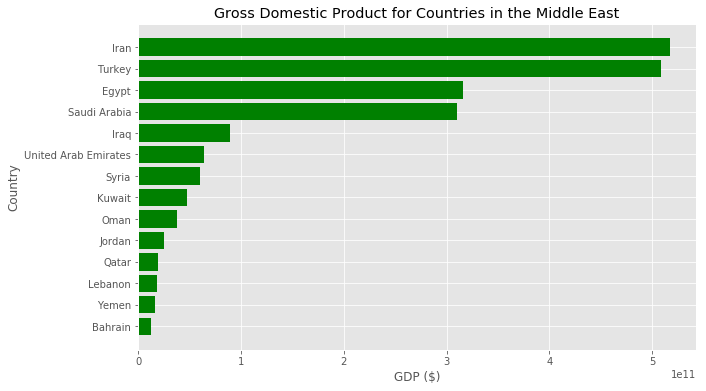

In [82]:
plt.barh(sorted_ME_GDP['Country'], sorted_ME_GDP['GDP'], color='green')
plt.xlabel('GDP ($)')
plt.ylabel('Country')
plt.title('Gross Domestic Product for Countries in the Middle East')

### Example Using BeautifulSoup to Scrape Data off the Internet 

In [272]:
import requests
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_Asian_countries_by_area').text
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')
# print(soup.prettify())

In [273]:
My_table = soup.find('table',{'class':'wikitable sortable'})
# My_table

In [99]:
links = My_table.findAll('a')
links

[<a href="/wiki/Russia" title="Russia">Russia</a>,
 <a href="#cite_note-russiaTotalAreaByCIA-1">[1]</a>,
 <a href="/wiki/China" title="China">China</a>,
 <a href="/wiki/Hong_Kong" title="Hong Kong">Hong Kong</a>,
 <a href="/wiki/Macau" title="Macau">Macau</a>,
 <a href="/wiki/India" title="India">India</a>,
 <a href="#cite_note-2">[2]</a>,
 <a href="/wiki/Kazakhstan" title="Kazakhstan">Kazakhstan</a>,
 <a href="/wiki/Saudi_Arabia" title="Saudi Arabia">Saudi Arabia</a>,
 <a href="/wiki/Iran" title="Iran">Iran</a>,
 <a href="/wiki/Mongolia" title="Mongolia">Mongolia</a>,
 <a href="/wiki/Indonesia" title="Indonesia">Indonesia</a>,
 <a href="/wiki/Pakistan" title="Pakistan">Pakistan</a>,
 <a href="/wiki/Turkey" title="Turkey">Turkey</a>,
 <a href="/wiki/Myanmar" title="Myanmar">Myanmar</a>,
 <a href="/wiki/Afghanistan" title="Afghanistan">Afghanistan</a>,
 <a href="/wiki/Yemen" title="Yemen">Yemen</a>,
 <a href="/wiki/Thailand" title="Thailand">Thailand</a>,
 <a href="/wiki/Turkmenistan" t

In [96]:
# Get the countries
Countries = []
for link in links:
    Countries.append(link.get('title'))
print(Countries)

['Russia', None, 'China', 'Hong Kong', 'Macau', 'India', None, 'Kazakhstan', 'Saudi Arabia', 'Iran', 'Mongolia', 'Indonesia', 'Pakistan', 'Turkey', 'Myanmar', 'Afghanistan', 'Yemen', 'Thailand', 'Turkmenistan', 'Uzbekistan', 'Iraq', 'Japan', 'Vietnam', 'Malaysia', 'Oman', 'Philippines', 'Laos', 'Kyrgyzstan', 'Syria', 'Golan Heights', 'Cambodia', 'Bangladesh', 'Nepal', 'Tajikistan', 'North Korea', 'South Korea', 'Jordan', 'Azerbaijan', 'United Arab Emirates', 'Georgia (country)', 'Sri Lanka', 'Egypt', 'Bhutan', 'Taiwan', 'Armenia', 'Kuwait', 'East Timor', 'Qatar', 'Lebanon', 'Israel', 'State of Palestine', 'Brunei', 'Singapore', 'Bahrain', 'Maldives']


In [110]:
# Use the following loop to remove None values from the Countries list
Valid_Countries = []
for country in Countries:
    if country != None:
        Valid_Countries.append(country)

print(Valid_Countries)

['Russia', 'China', 'Hong Kong', 'Macau', 'India', 'Kazakhstan', 'Saudi Arabia', 'Iran', 'Mongolia', 'Indonesia', 'Pakistan', 'Turkey', 'Myanmar', 'Afghanistan', 'Yemen', 'Thailand', 'Turkmenistan', 'Uzbekistan', 'Iraq', 'Japan', 'Vietnam', 'Malaysia', 'Oman', 'Philippines', 'Laos', 'Kyrgyzstan', 'Syria', 'Golan Heights', 'Cambodia', 'Bangladesh', 'Nepal', 'Tajikistan', 'North Korea', 'South Korea', 'Jordan', 'Azerbaijan', 'United Arab Emirates', 'Georgia (country)', 'Sri Lanka', 'Egypt', 'Bhutan', 'Taiwan', 'Armenia', 'Kuwait', 'East Timor', 'Qatar', 'Lebanon', 'Israel', 'State of Palestine', 'Brunei', 'Singapore', 'Bahrain', 'Maldives']


In [118]:
Countries_df = pd.DataFrame()
Countries_df['Country'] = Valid_Countries
Countries_df.sort_values(by=['Country']).head(10).reset_index(drop = True)

,Country
0,Afghanistan
1,Armenia
2,Azerbaijan
3,Bahrain
4,Bangladesh
5,Bhutan
6,Brunei
7,Cambodia
8,China
9,East Timor


In [274]:
# GDP per Capita
my_url = requests.get("https://www.indexmundi.com/map/?v=67&r=me&l=en").text
my_soup = BeautifulSoup(my_url,'html.parser')
# print(my_soup.prettify())

In [221]:
# Scrape the table data (Country, GDP Per Capita, Year)
Country_Info_list = my_soup.findAll('table')[2].findAll('tr')
countries = []
GDP = []
Years = []
ls = []
for row in Country_Info_list:
    ls.append(row.findAll('td'))

ls_cleaned = ls[1:]
import numpy as np
# ls[1][2].text
for i in np.arange(len(ls_cleaned)):
    countries.append(ls_cleaned[i][0].text)
    GDP.append(int(ls_cleaned[i][1].text.replace(",", "")))
    Years.append(int(ls_cleaned[i][2].text))

# Now create a dataframe of the countries, GDP and the years
Country_GDP_PPP = pd.DataFrame({'Country': countries, 'GDP Per Capita ($)': GDP, 'Year': Years})

sorted_ME_GDP

,Country,GDP
0,Bahrain,1.301000e+10
1,Yemen,1.625000e+10
2,Lebanon,1.883000e+10
3,Qatar,1.949000e+10
4,Jordan,2.550000e+10
5,Oman,3.809000e+10
6,Kuwait,4.800000e+10
7,Syria,6.044000e+10
8,United Arab Emirates,6.367000e+10
9,Iraq,8.980000e+10


In [259]:
# Join the tables, and sort in descending GDP Per Capita order
df_merged_sorted = pd.merge(GDP_ME, Country_GDP_PPP, on = "Country").sort_values(by = ['GDP Per Capita ($)'], ascending = False)

In [260]:
# Find the ratio between GDP and GDP per capita
df_merged_sorted['Population'] = df_merged_sorted['GDP'] / df_merged_sorted['GDP Per Capita ($)']

In [267]:
# Rename the 'Population' to Ratio
df_merged_sorted.columns.values[4] = 'Ratio'

In [268]:
df_merged_sorted

,Country,GDP,GDP Per Capita ($),Year,Ratio
7,Qatar,1.949000e+10,124900,2017,1.560448e+05
4,Kuwait,4.800000e+10,69700,2017,6.886657e+05
11,United Arab Emirates,6.367000e+10,68200,2017,9.335777e+05
8,Saudi Arabia,3.102000e+11,55300,2017,5.609403e+06
0,Bahrain,1.301000e+10,51800,2017,2.511583e+05
6,Oman,3.809000e+10,45500,2017,8.371429e+05
10,Turkey,5.087000e+11,26500,2017,1.919623e+07
1,Iran,5.167000e+11,20000,2017,2.583500e+07
5,Lebanon,1.883000e+10,19500,2017,9.656410e+05
2,Iraq,8.980000e+10,17000,2017,5.282353e+06


#### Data Visualization Using Seaborn Package

In [263]:
import seaborn as sns
sns.set(style="whitegrid")

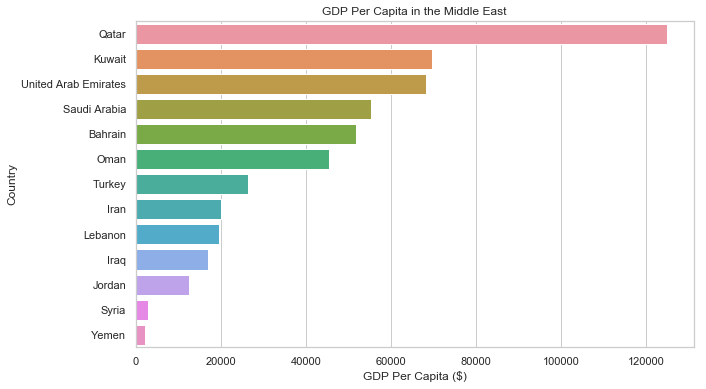

In [266]:
ax = sns.barplot(x='GDP Per Capita ($)', y='Country', data = df_merged_sorted). set_title('GDP Per Capita in the Middle East')

### References

https://erikrood.com/Python_References/web_scrape.html

https://medium.com/analytics-vidhya/web-scraping-wiki-tables-using-beautifulsoup-and-python-6b9ea26d8722

https://www.datacamp.com/community/tutorials/joining-dataframes-pandas

https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

http://benalexkeen.com/bar-charts-in-matplotlib/

https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/

https://datatofish.com/dropna/

https://data36.com/pandas-tutorial-1-basics-reading-data-files-dataframes-data-selection/

http://duspviz.mit.edu/tutorials/python-scraping/

https://www.datacamp.com/community/tutorials/web-scraping-using-python

